# Comprehensive NFL Play-by-Play Data Cleaning, EDA, Feature Engineering, preprocessing, and Modeling

# Initial Setup and Data Loading

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Set up visualization settings
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', 100)
warnings.filterwarnings('ignore')
# Load the dataset
df = pd.read_csv("../input/nflplaybyplay2009to2016/NFL Play by Play 2009-2017 (v4).csv")


# Initial Inspection

In [2]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (407688, 102)


In [3]:
display(df.head())

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult,...,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,30.0,30.0,0,0,0.0,NaN,PIT,TEN,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,1,39,0,0,NaN,NaN,NaN,0,0,NaN,Kickoff,NaN,NaN,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,...,M.Griffin,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,NaN,3,3,3,3,3,0.001506,0.179749,0.006639,0.281138,0.213700,0.003592,0.313676,0.0,0.0,0.323526,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,42.0,58.0,10,5,0.0,0.0,PIT,TEN,(14:53) B.Roethlisberger pass short left to H....,1,5,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Complete,Short,-3,8,0,left,0,NaN,NaN,NaN,0,NaN,NaN,H.Ward,00-0017162,1,NaN,...,C.Hope,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,NaN,3,3,3,3,3,0.000969,0.108505,0.001061,0.169117,0.293700,0.003638,0.423011,0.0,0.0,2.338000,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,47.0,53.0,5,2,0.0,0.0,PIT,TEN,(14:16) W.Parker right end to PIT 44 for -3 ya...,1,-3,0,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,NaN,0,NaN,NaN,0,0,0,NaN,0,NaN,W.Parker,00-0022250,1,right,end,NaN,NaN,0,NaN,...,S.Tulloch,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,NaN,3,3,3,3,3,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,44.0,56.0,8,2,0.0,0.0,PIT,TEN,(13:35) (Shotgun) B.Roethlisberger pass incomp...,1,0,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Incomplete Pass,Deep,34,0,0,right,0,NaN,NaN,NaN,0,NaN,NaN,M.Wallace,00-0026901,0,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,NaN,3,3,3,3,3,0.001434,0.149088,0.001944,0.234801,0.289336,0.004776,0.318621,0.0,0.0,1.013147,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,44.0,56.0,8,2,0.0,1.0,PIT,TEN,(13:27) (Punt formation) D.Sepulveda punts 54 ...,1,0,0,0,NaN,NaN,NaN,0,0,Clean,Punt,NaN,NaN,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,NaN,3,3,3,3,3,0.001861,0.213480,0.003279,0.322262,0.244603,0.006404,0.208111,0.0,0.0,-0.699436,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407688 entries, 0 to 407687
Columns: 102 entries, Date to Season
dtypes: float64(33), int64(31), object(38)
memory usage: 317.3+ MB


# Initial Data Exploration

In [5]:
# Basic statistics for numerical columns
print("Description statistics for numerical columns:")
display(df.describe(include=[np.number]).T)

Description statistics for numerical columns:


,count,mean,std,min,25%,50%,75%,max
GameID,407688.0,2.013158e+09,2.572839e+06,2.009091e+09,2.011101e+09,2.013111e+09,2.015121e+09,2.017123e+09
Drive,407688.0,1.231616e+01,7.149527e+00,1.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,3.500000e+01
qtr,407688.0,2.577412e+00,1.129750e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
down,346534.0,2.002476e+00,1.006353e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00
TimeUnder,407688.0,7.374200e+00,4.642388e+00,0.000000e+00,3.000000e+00,7.000000e+00,1.100000e+01,1.500000e+01
...,...,...,...,...,...,...,...,...
Win_Prob,382679.0,5.013200e-01,2.874451e-01,0.000000e+00,2.764722e-01,5.044697e-01,7.254773e-01,1.000000e+00
WPA,402147.0,2.099075e-03,4.536270e-02,-9.972143e-01,-1.472843e-02,0.000000e+00,1.468444e-02,9.948482e-01
airWPA,159187.0,1.513460e-02,5.648963e-02,-9.998808e-01,-1.151850e-02,3.440945e-03,3.579194e-02,9.948482e-01
yacWPA,158926.0,-1.048016e-02,6.813864e-02,-9.866730e-01,-1.868269e-02,0.000000e+00,1.143089e-02,1.000000e+00


In [6]:
# Basics statistics for categorical columns
print("Descriptive statistcs for categorical columns:")
display(df.describe(include=['object']).T)

Descriptive statistcs for categorical columns:


,count,unique,top,freq
Date,407688,426,2016-01-03,2872
time,407464,901,15:00,11792
SideofField,407160,37,OAK,13270
posteam,382696,35,NE,12520
DefensiveTeam,382696,35,PHI,12321
desc,407686,375962,Two-Minute Warning,3739
ExPointResult,10110,4,Made,9850
TwoPointConv,605,2,Failure,322
DefTwoPoint,24,2,Failure,19
PuntResult,22371,2,Clean,22253


In [7]:
# Check for constant columns
constant_cols = [col for col in df.columns if df[col].nunique() == 1]
print(f"Constant columns: {constant_cols}")

Constant columns: ['PlayAttempted']


# Handling Missing Values

Columns with missing values:


DefTwoPoint            99.994113
BlockingPlayer         99.971302
TwoPointConv           99.851602
ChalReplayResult       99.165538
RecFumbPlayer          98.927366
                         ...    
Opp_Safety_Prob         0.043170
Opp_Field_Goal_Prob     0.043170
No_Score_Prob           0.043170
Field_Goal_Prob         0.043170
desc                    0.000491
Length: 65, dtype: float64

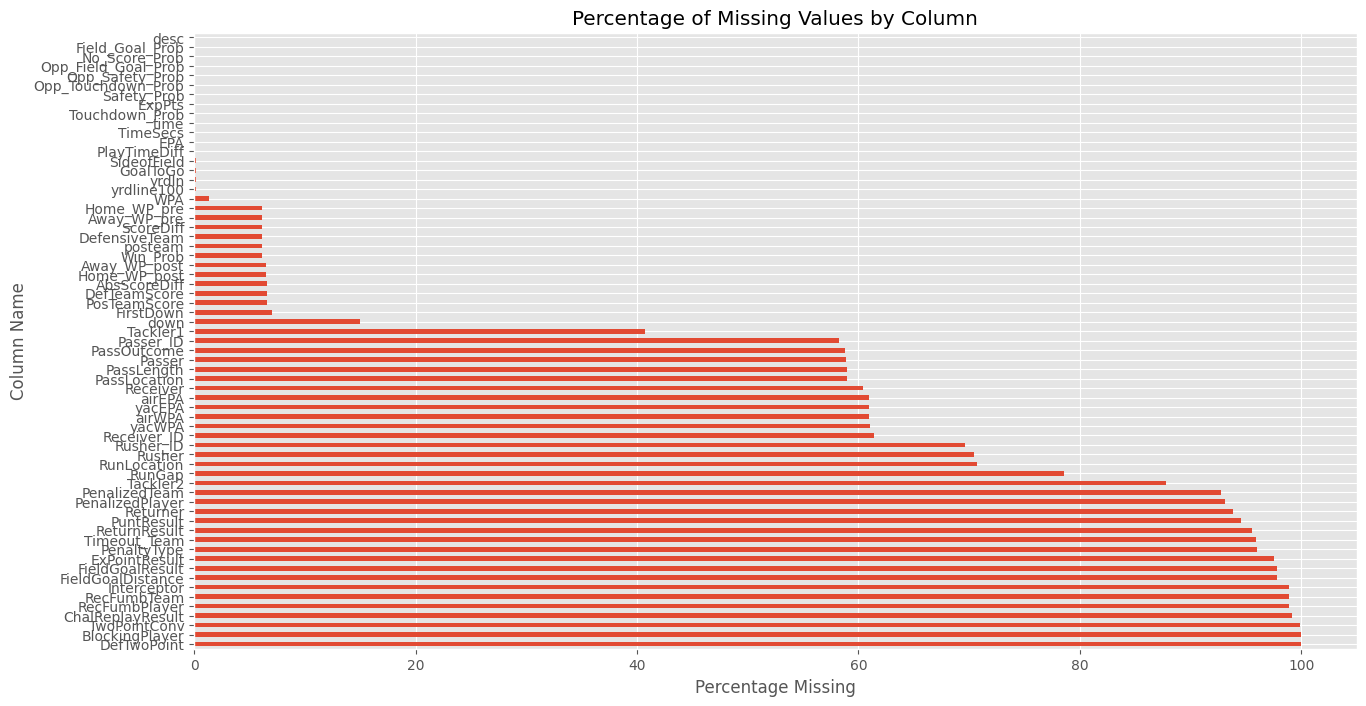


Missing values after cleaning:


down                    61154
time                      224
SideofField               528
yrdln                     840
yrdline100                840
posteam                 24992
DefensiveTeam           24992
ExPointResult          397578
Passer_ID              237445
PassLength             240520
Rusher_ID              283654
Receiver_ID            250328
ReturnResult           389450
RecFumbTeam            403315
PenalizedTeam          378189
PosTeamScore            26904
DefTeamScore            26904
AbsScoreDiff            26904
Timeout_Team           390885
No_Score_Prob             176
Opp_Field_Goal_Prob       176
Opp_Safety_Prob           176
Opp_Touchdown_Prob        176
Field_Goal_Prob           176
Safety_Prob               176
Touchdown_Prob            176
Home_WP_pre             24954
Away_WP_pre             24954
Home_WP_post            26587
Away_WP_post            26587
Win_Prob                25009
WPA                      5541
airWPA                 248501
yacWPA    

In [8]:
# Calculate missing value percentages
missing_percent = df.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

print("Columns with missing values:")
display(missing_percent)

# Visualize missing values
plt.figure(figsize=(15, 8))
missing_percent.plot(kind='barh')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Percentage Missing')
plt.ylabel('Column Name')
plt.show()

# Strategy for handling missing values
def handle_missing_values(df):
    # Create a copy to avoid SettingWithCopyWarning
    df_clean = df.copy()
    
    # Columns to drop (high missingness or not useful)
    cols_to_drop = [
        'Unnamed: 0',  # If present (often an index column)
        'BlockingPlayer',  # Very high missingness
        'ChalReplayResult',  # Very high missingness
        'Challenge.Replay',  # Very high missingness
        'DefTwoPoint',  # Very high missingness
        'TwoPointConv',  # Very high missingness
        'Interceptor',  # Very high missingness
        'RecFumbPlayer',  # Very high missingness
        'PenaltyType',  # High missingness and can be inferred
        'PenalizedPlayer',  # High missingness
        'Tackler2',  # High missingness
        'Tackler1',  # High missingness
        'Returner',  # High missingness
    ]
    df_clean = df_clean.drop(columns=[col for col in cols_to_drop if col in df_clean.columns])
    
    # For play description, fill with empty string
    if 'desc' in df_clean.columns:
        df_clean['desc'] = df_clean['desc'].fillna('')
    
    # For categorical play-related columns, fill with 'None' or appropriate value
    categorical_cols = [
        'PassOutcome', 'PassLocation', 'RunLocation', 'RunGap',
        'PenaltyType', 'PlayType', 'FieldGoalResult', 'PuntResult'
    ]
    for col in categorical_cols:
        if col in df_clean.columns:
            df_clean[col] = df_clean[col].fillna('None')
    
    # For numerical play-related columns, fill with 0 or median
    numerical_cols = [
        'Yards.Gained', 'AirYards', 'YardsAfterCatch', 'FieldGoalDistance',
        'Penalty.Yards', 'ScoreDiff', 'ExpPts', 'EPA', 'airEPA', 'yacEPA'
    ]
    for col in numerical_cols:
        if col in df_clean.columns:
            median_val = df_clean[col].median()
            df_clean[col] = df_clean[col].fillna(median_val if col != 'Yards.Gained' else 0)
    
    # For binary indicators, fill with 0 (assuming missing means didn't happen)
    binary_cols = [
        'Touchdown', 'Safety', 'Onsidekick', 'FirstDown', 'GoalToGo',
        'PassAttempt', 'RushAttempt', 'Reception', 'InterceptionThrown',
        'Fumble', 'Sack', 'QBHit', 'Timeout_Indicator'
    ]
    for col in binary_cols:
        if col in df_clean.columns:
            df_clean[col] = df_clean[col].fillna(0).astype(int)
    
    # For time-related columns, use forward fill within games
    time_cols = ['TimeUnder', 'TimeSecs', 'PlayTimeDiff']
    for col in time_cols:
        if col in df_clean.columns:
            df_clean[col] = df_clean.groupby('GameID')[col].ffill().bfill()
    
    # For player columns, fill with 'None'
    player_cols = ['Passer', 'Rusher', 'Receiver']
    for col in player_cols:
        if col in df_clean.columns:
            df_clean[col] = df_clean[col].fillna('None')
    
    return df_clean

# Apply missing value handling
df_clean = handle_missing_values(df)

# Verify missing values after cleaning
print("\nMissing values after cleaning:")
display(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])

# Data Cleaning and Type Conversion

In [9]:
def clean_and_convert_types(df):
    # Convert date column to datetime
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
    
    # Ensure categorical columns have correct type
    categorical_cols = [
        'GameID', 'posteam', 'DefensiveTeam', 'PlayType', 'PassOutcome',
        'PassLocation', 'RunLocation', 'RunGap', 'FieldGoalResult', 'PuntResult',
        'HomeTeam', 'AwayTeam', 'Timeout_Team', 'PenalizedTeam'
    ]
    for col in categorical_cols:
        if col in df.columns:
            df[col] = df[col].astype('category')
    
    # Convert binary columns to int
    binary_cols = [
        'Touchdown', 'Safety', 'Onsidekick', 'FirstDown', 'GoalToGo',
        'PassAttempt', 'RushAttempt', 'Reception', 'InterceptionThrown',
        'Fumble', 'Sack', 'QBHit', 'Timeout_Indicator'
    ]
    for col in binary_cols:
        if col in df.columns:
            df[col] = df[col].astype(int)
    
    # Clean yard line information
    if 'yrdln' in df.columns:
        df['yrdln'] = df['yrdln'].astype(str)
        df['yrdln_num'] = df['yrdln'].str.extract('(\d+)').astype(float)
        df['yrdln_side'] = df['yrdln'].str.extract('([A-Za-z]+)')
        df['yrdln_num_adj'] = np.where(
            df['posteam'] == df['yrdln_side'],
            100 - df['yrdln_num'],
            df['yrdln_num']
        )
    
    # Clean time columns (with error handling)
    if 'time' in df.columns:
        # Fill missing/invalid times with "0:00" and split
        df['time'] = df['time'].fillna('0:00').astype(str)
        time_parts = df['time'].str.split(':', expand=True)
        
        # Handle cases where splitting fails (e.g., malformed strings)
        df['time_min'] = pd.to_numeric(time_parts[0], errors='coerce').fillna(0).astype(int)
        df['time_sec'] = pd.to_numeric(time_parts[1], errors='coerce').fillna(0).astype(int)
        df['time_secs_total'] = df['time_min'] * 60 + df['time_sec']
    
    return df

df_clean = clean_and_convert_types(df_clean)

# Exploratory Data Analysis

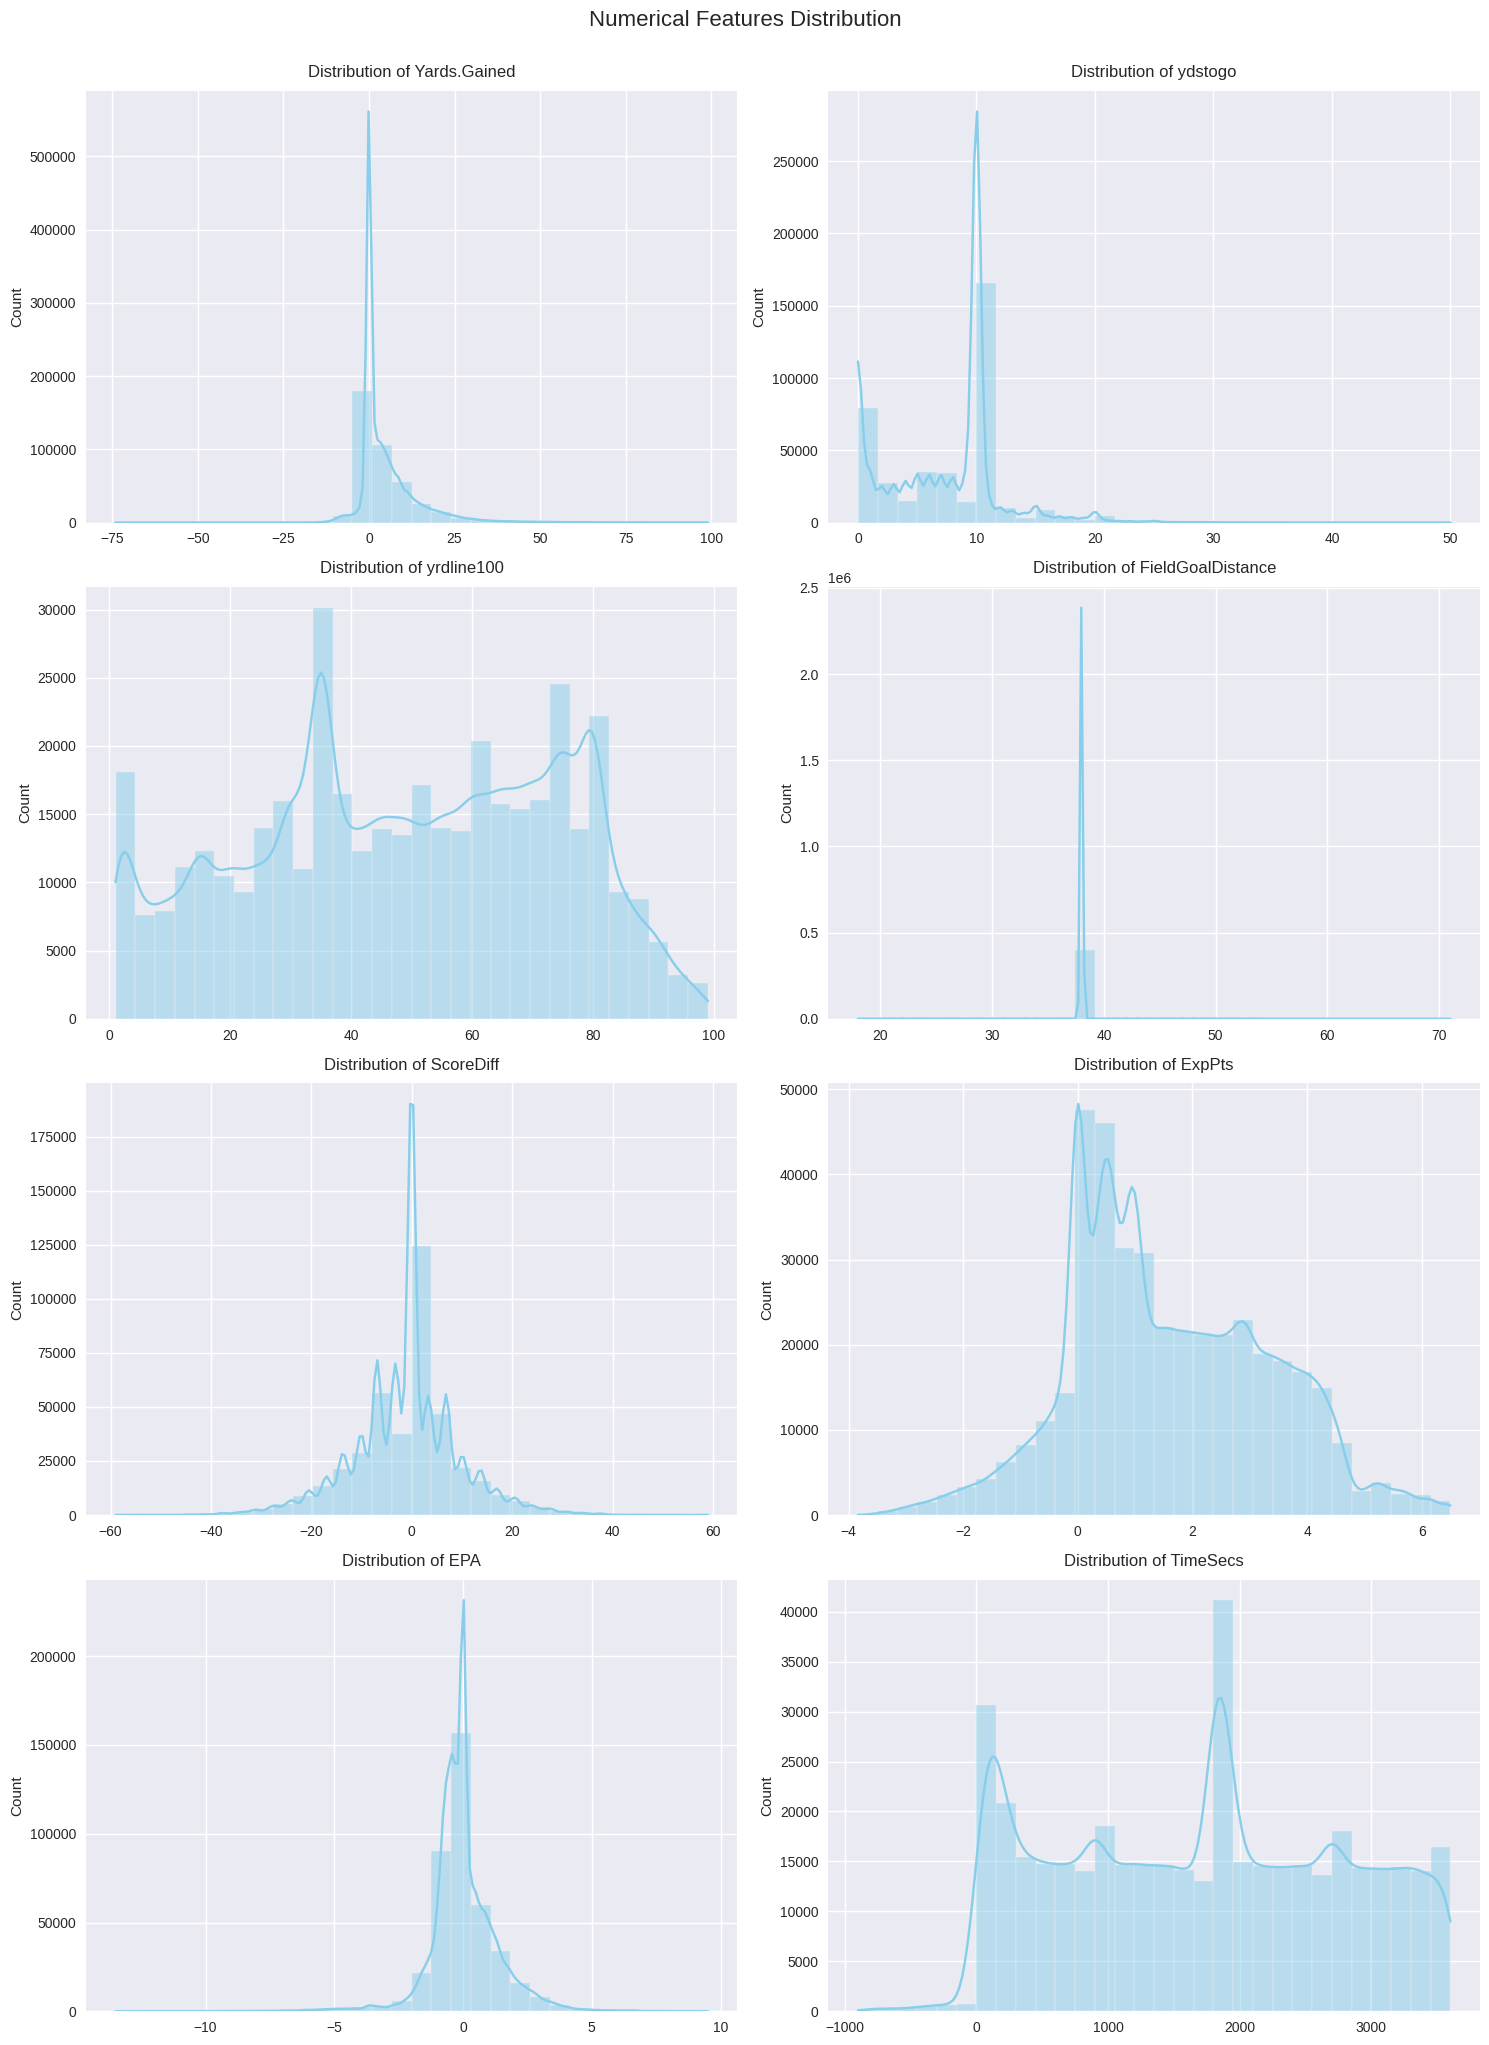

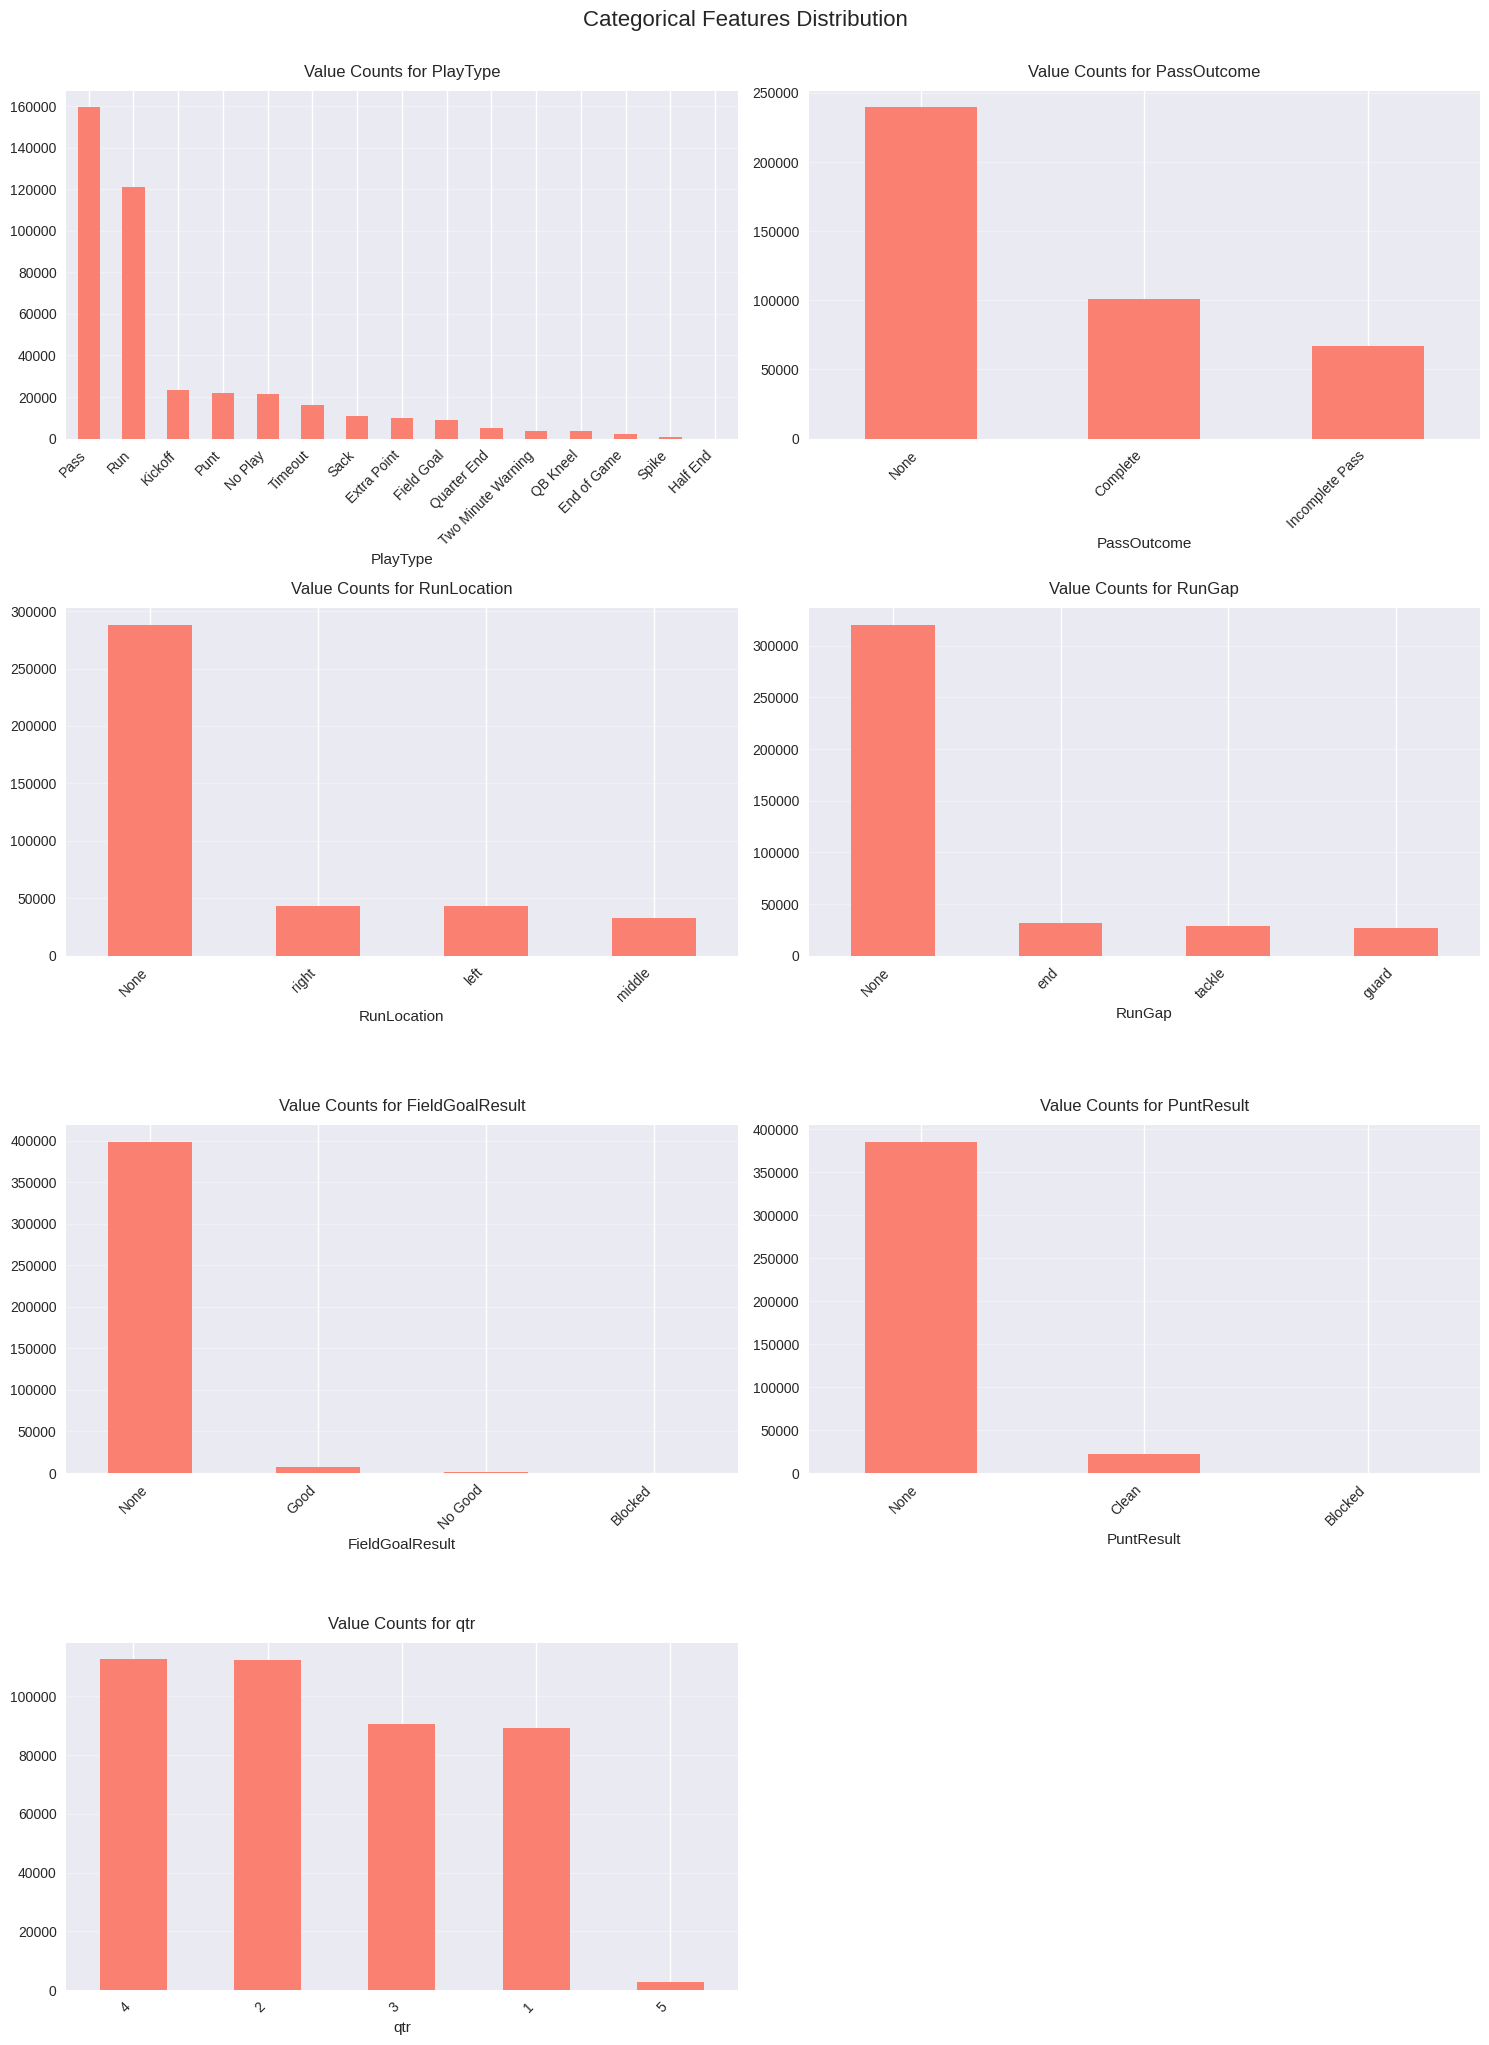

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better visuals
plt.style.use('seaborn')

# ======================================================================
# 1. Numerical Columns Distribution (Histograms with KDE)
# ======================================================================
key_num_cols = [
    'Yards.Gained', 'ydstogo', 'yrdline100', 'FieldGoalDistance',
    'ScoreDiff', 'ExpPts', 'EPA', 'TimeSecs'
]

# Create figure with 4x2 grid (for 8 numerical features)
plt.figure(figsize=(15, 20))
for i, col in enumerate(key_num_cols, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df_clean[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=12, pad=10)
    plt.xlabel('')
plt.tight_layout()
plt.suptitle('Numerical Features Distribution', y=1.02, fontsize=16)
plt.show()

# ======================================================================
# 2. Categorical Columns Distribution (Bar plots)
# ======================================================================
key_cat_cols = [
    'PlayType', 'PassOutcome', 'RunLocation', 'RunGap',
    'FieldGoalResult', 'PuntResult', 'qtr'
]

# Create figure with 4x2 grid (for 7 categorical features)
plt.figure(figsize=(15, 20))
for i, col in enumerate(key_cat_cols, 1):
    plt.subplot(4, 2, i)
    df_clean[col].value_counts().plot(kind='bar', color='salmon')
    plt.title(f'Value Counts for {col}', fontsize=12, pad=10)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.suptitle('Categorical Features Distribution', y=1.02, fontsize=16)
plt.show()